# Trabajo Práctico Final
## Aprendizaje Profundo
## Ejercicio 1


##  Cohorte : 6Co2022

### Marcelo Chichiri


#### Enunciado :
Descargar el dataset desde el siguiente link. Entrenar el modelo propuesto a continuación de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por qué? Explicar el procedimiento realizado.

yhat = x^3 W1 + X^2 W2 + X W1 + b

#### Resultados:
Se utilizó gradiente descendente con SGD y momentum de primer orden para ajustar los parámetros W1, W2 y b.\
El modelo está haciendo underfeeting. \
El MSE solo alcanzó a 0.51 \
Se utilizaron 5000 epocas, pero se vió que a partir de la epoca 1000 el error no disminuye.\
Se concluye que la función seleccionada para aprender la distribución del dataset no es suficiente para obtener un error cuadrado medio bajo y poder reproducirla.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_csv('dataset_1.csv')

In [3]:
len(df)

10000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   # X     10000 non-null  float64
 1   Y       10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


In [5]:
df.head()

,# X,Y
0,1.791979,4.952906
1,0.846885,1.424248
2,1.000300,0.454364
3,1.884188,6.681510
4,0.889089,1.211691


In [6]:
# Split
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [7]:
n = len(x)
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[0:int(0.80 * n)]
valid_idx = idx[int(0.20 * n):]

In [8]:
n_train = len(train_idx)
n_valid = len(valid_idx)
print(f'datos para train : {n_train}, datos para valid : {n_valid}')

datos para train : 8000, datos para valid : 8000


(8000,)
(8000,)
(8000,)
(8000,)


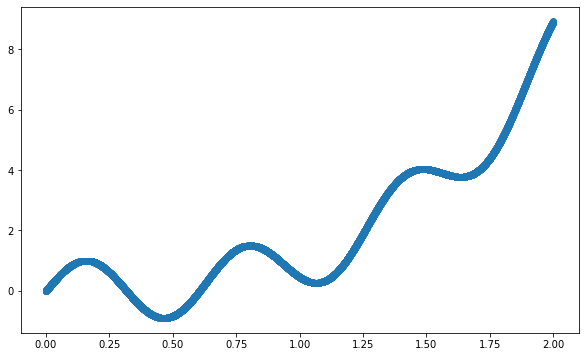

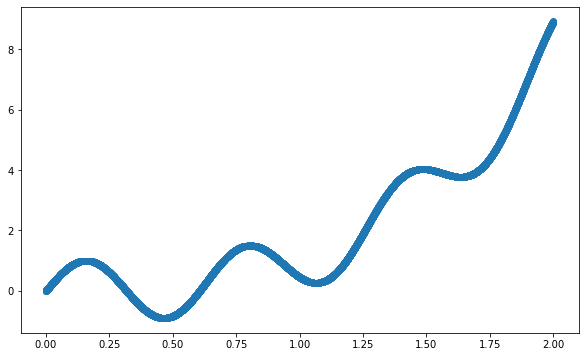

In [9]:
#X_train = X_norm[train_idx]
x_train = x[train_idx]
y_train = y[train_idx]
print(x_train.shape)
print(y_train.shape)

#X_valid = X_norm[valid_idx]
x_valid = x[valid_idx]
y_valid = y[valid_idx]
print(x_valid.shape)
print(y_valid.shape)

plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(x_valid, y_valid)
plt.show()

In [11]:
v = np.zeros(3)

In [12]:
# Algoritmo de entrenamiento por SGD y momentum de primer orden 

# Inicialización de variables
np.random.seed(1)
w = np.random.random(size = (3)) # Pesos iniciales
v = np.zeros(3) # Inicialización de momentum
err = 0 # error
err2 = 0 # error cuadrado
suma_err2 = 0
n_epocas = 5000
i = 0
alfa = 0.00001 # Learning rate
beta = 0.01 # factor de momentum
MSEi = []
neto = float(0)
y_hat = float(0)

for epocas in range(n_epocas):
    i = 0
    suma_err2 = 0
    for xi in range(len(x_train)):
        x = x_train[xi]
        y = y_train[xi]
        # Fordware
        
        y_hat = (x**3) * w[1] + (x**2) * w[2] + x * w[1] + w[0]
       
       # salida_neurona[0] = neto

        err = (y - y_hat)  
        
        err2 = err ** 2
        suma_err2 = suma_err2 + err2 
        
        # Backpropagation

        v[0] = beta * v[0] + (alfa * -2 * err) # w[0] es el bias
        v[1] = beta * v[1] + (alfa * -2 * err) * (x**3 + x)
        v[2] = beta * v[2] + (alfa * -2 * err) * (x**2)
        
        w[0] = w[0] - v[0] # w[0] es el bias
        w[1] = w[1] - v[1]
        w[2] = w[2] - v[2]
        
        #print(i)
      #  i = i + 1
        #if i == len(err):
        #    i = 0
        
    MSE = suma_err2 / len(x_train)     
    MSEi.append(MSE)    
    print(f'epoca : {epocas} MSE {MSE}, err2: {err2}')

tmp = min(MSEi)
index = MSEi.index(tmp)

print(f'El menor MSE es ', tmp, ' se presenta en la epoca ', index)
print(f'w = {w}')

epoca : 0 MSE 0.7850716338868527, err2: 2.16555088117005
epoca : 1 MSE 0.7423885714908735, err2: 2.039963251680072
epoca : 2 MSE 0.7169298336934483, err2: 1.9304327009325286
epoca : 3 MSE 0.694904796017103, err2: 1.8315152135318138
epoca : 4 MSE 0.6758553223899205, err2: 1.7419611503163372
epoca : 5 MSE 0.6593776151014865, err2: 1.660785166757027
epoca : 6 MSE 0.6451220202118813, err2: 1.587119325754482
epoca : 7 MSE 0.6327864053750856, err2: 1.5201947971598344
epoca : 8 MSE 0.6221097240579598, err2: 1.4593295902549546
epoca : 9 MSE 0.612866429292049, err2: 1.4039179830994724
epoca : 10 MSE 0.6048616461833104, err2: 1.3534213063095528
epoca : 11 MSE 0.5979270008671979, err2: 1.3073598992205968
epoca : 12 MSE 0.5919170166716753, err2: 1.265306084554583
epoca : 13 MSE 0.5867060003565198, err2: 1.2268780283689016
epoca : 14 MSE 0.5821853517850512, err2: 1.1917343698139955
epoca : 15 MSE 0.578261239447119, err2: 1.159569520585458
epoca : 16 MSE 0.5748525920823122, err2: 1.1301095472499103


epoca : 142 MSE 0.5398518737245477, err2: 0.8306158100813669
epoca : 143 MSE 0.539760146969164, err2: 0.8310546040724719
epoca : 144 MSE 0.5396687101812125, err2: 0.8314929840483202
epoca : 145 MSE 0.5395775624441597, err2: 0.831930938828629
epoca : 146 MSE 0.5394867028444047, err2: 0.8323684580570273
epoca : 147 MSE 0.539396130471236, err2: 0.8328055321432751
epoca : 148 MSE 0.5393058444168388, err2: 0.8332421522094364
epoca : 149 MSE 0.539215843776272, err2: 0.8336783100399113
epoca : 150 MSE 0.5391261276474645, err2: 0.83411399803496
epoca : 151 MSE 0.5390366951311967, err2: 0.8345492091674165
epoca : 152 MSE 0.538947545331079, err2: 0.834983936942565
epoca : 153 MSE 0.5388586773535646, err2: 0.8354181753607487
epoca : 154 MSE 0.5387700903079246, err2: 0.8358519188826078
epoca : 155 MSE 0.5386817833062353, err2: 0.8362851623968055
epoca : 156 MSE 0.5385937554633766, err2: 0.8367179011899618
epoca : 157 MSE 0.5385060058970208, err2: 0.8371501309187356
epoca : 158 MSE 0.53841853372761

epoca : 282 MSE 0.5294621181983259, err2: 0.8869414501585238
epoca : 283 MSE 0.5294032359874103, err2: 0.8873067000779099
epoca : 284 MSE 0.529344539916769, err2: 0.8876714472026388
epoca : 285 MSE 0.5292860293979589, err2: 0.8880356920905602
epoca : 286 MSE 0.5292277038443829, err2: 0.8883994352993831
epoca : 287 MSE 0.5291695626712991, err2: 0.8887626773867374
epoca : 288 MSE 0.5291116052958288, err2: 0.8891254189101273
epoca : 289 MSE 0.5290538311369237, err2: 0.8894876604269534
epoca : 290 MSE 0.5289962396153749, err2: 0.8898494024944766
epoca : 291 MSE 0.5289388301538098, err2: 0.8902106456698502
epoca : 292 MSE 0.5288816021766725, err2: 0.8905713905101139
epoca : 293 MSE 0.5288245551102262, err2: 0.890931637572154
epoca : 294 MSE 0.528767688382561, err2: 0.8912913874127194
epoca : 295 MSE 0.5287110014235653, err2: 0.8916506405884507
epoca : 296 MSE 0.5286544936649262, err2: 0.8920093976558384
epoca : 297 MSE 0.5285981645401376, err2: 0.8923676591712192
epoca : 298 MSE 0.528542013

epoca : 420 MSE 0.5228685616672825, err2: 0.9328295315067603
epoca : 421 MSE 0.5228305230693638, err2: 0.9331305877809063
epoca : 422 MSE 0.5227926047183779, err2: 0.9334312162514438
epoca : 423 MSE 0.5227548062341884, err2: 0.933731417441945
epoca : 424 MSE 0.5227171272378563, err2: 0.9340311918756491
epoca : 425 MSE 0.5226795673516492, err2: 0.9343305400754213
epoca : 426 MSE 0.5226421261990165, err2: 0.9346294625638345
epoca : 427 MSE 0.5226048034046114, err2: 0.9349279598630633
epoca : 428 MSE 0.5225675985942606, err2: 0.9352260324949582
epoca : 429 MSE 0.5225305113949842, err2: 0.9355236809810186
epoca : 430 MSE 0.5224935414349816, err2: 0.9358209058423891
epoca : 431 MSE 0.5224566883436205, err2: 0.9361177075998603
epoca : 432 MSE 0.5224199517514414, err2: 0.9364140867738887
epoca : 433 MSE 0.5223833312901542, err2: 0.9367100438845604
epoca : 434 MSE 0.5223468265926358, err2: 0.9370055794516247
epoca : 435 MSE 0.5223104372929236, err2: 0.9373006939944535
epoca : 436 MSE 0.5222741

epoca : 556 MSE 0.518658413796822, err2: 0.9700556367437679
epoca : 557 MSE 0.5186336841307668, err2: 0.9703031657757443
epoca : 558 MSE 0.5186090326382121, err2: 0.9705503347269333
epoca : 559 MSE 0.5185844590720141, err2: 0.9707971440673928
epoca : 560 MSE 0.5185599631858353, err2: 0.9710435942667225
epoca : 561 MSE 0.5185355447341035, err2: 0.9712896857941165
epoca : 562 MSE 0.5185112034720291, err2: 0.9715354191183329
epoca : 563 MSE 0.5184869391555901, err2: 0.9717807947076985
epoca : 564 MSE 0.5184627515415464, err2: 0.9720258130301
epoca : 565 MSE 0.5184386403874149, err2: 0.9722704745530236
epoca : 566 MSE 0.5184146054514871, err2: 0.9725147797435004
epoca : 567 MSE 0.5183906464928181, err2: 0.9727587290681272
epoca : 568 MSE 0.5183667632712203, err2: 0.973002322993085
epoca : 569 MSE 0.51834295554727, err2: 0.973245561984116
epoca : 570 MSE 0.5183192230822966, err2: 0.9734884465065302
epoca : 571 MSE 0.51829556563839, err2: 0.9737309770252104
epoca : 572 MSE 0.51827198297838, 

epoca : 691 MSE 0.5159374283668476, err2: 1.0003978527524156
epoca : 692 MSE 0.515921299978563, err2: 1.0006008474643844
epoca : 693 MSE 0.515905222572886, err2: 1.0008035415896472
epoca : 694 MSE 0.5158891959886504, err2: 1.0010059355387657
epoca : 695 MSE 0.5158732200652052, err2: 1.0012080297218873
epoca : 696 MSE 0.5158572946423874, err2: 1.0014098245486645
epoca : 697 MSE 0.515841419560562, err2: 1.0016113204283557
epoca : 698 MSE 0.5158255946605821, err2: 1.001812517769751
epoca : 699 MSE 0.515809819783818, err2: 1.0020134169811916
epoca : 700 MSE 0.5157940947721278, err2: 1.0022140184705863
epoca : 701 MSE 0.5157784194678774, err2: 1.0024143226453897
epoca : 702 MSE 0.515762793713936, err2: 1.0026143299126251
epoca : 703 MSE 0.515747217353654, err2: 1.002814040678868
epoca : 704 MSE 0.515731690230894, err2: 1.003013455350247
epoca : 705 MSE 0.5157162121900009, err2: 1.0032125743324405
epoca : 706 MSE 0.5157007830758166, err2: 1.0034113980306993
epoca : 707 MSE 0.5156854027336703

epoca : 832 MSE 0.5141002094128725, err2: 1.0262341065472829
epoca : 833 MSE 0.514089888484288, err2: 1.0263985693316575
epoca : 834 MSE 0.5140796001796643, err2: 1.0265627850872623
epoca : 835 MSE 0.5140693443958713, err2: 1.0267267541633105
epoca : 836 MSE 0.514059121030102, err2: 1.0268904769086233
epoca : 837 MSE 0.5140489299798805, err2: 1.027053953671592
epoca : 838 MSE 0.5140387711430505, err2: 1.0272171848001717
epoca : 839 MSE 0.5140286444177764, err2: 1.0273801706419285
epoca : 840 MSE 0.5140185497025477, err2: 1.0275429115439763
epoca : 841 MSE 0.5140084868961794, err2: 1.0277054078530299
epoca : 842 MSE 0.5139984558977971, err2: 1.0278676599153789
epoca : 843 MSE 0.513988456606853, err2: 1.0280296680768883
epoca : 844 MSE 0.5139784889231082, err2: 1.0281914326830126
epoca : 845 MSE 0.5139685527466511, err2: 1.0283529540787815
epoca : 846 MSE 0.5139586479778822, err2: 1.028514232608814
epoca : 847 MSE 0.5139487745175123, err2: 1.0286752686173
epoca : 848 MSE 0.51393893226657

epoca : 969 MSE 0.5129511515390651, err2: 1.046604779420959
epoca : 970 MSE 0.5129444626682848, err2: 1.0467384799964705
epoca : 971 MSE 0.5129377949399265, err2: 1.0468719775811561
epoca : 972 MSE 0.5129311482871604, err2: 1.047005272469219
epoca : 973 MSE 0.5129245226433559, err2: 1.0471383649544546
epoca : 974 MSE 0.5129179179421077, err2: 1.047271255330309
epoca : 975 MSE 0.5129113341172115, err2: 1.0474039438898197
epoca : 976 MSE 0.5129047711026741, err2: 1.047536430925683
epoca : 977 MSE 0.512898228832712, err2: 1.0476687167301741
epoca : 978 MSE 0.5128917072417449, err2: 1.047800801595217
epoca : 979 MSE 0.5128852062644088, err2: 1.047932685812335
epoca : 980 MSE 0.5128787258355375, err2: 1.0480643696727132
epoca : 981 MSE 0.5128722658901789, err2: 1.048195853467106
epoca : 982 MSE 0.5128658263635799, err2: 1.0483271374859442
epoca : 983 MSE 0.5128594071911914, err2: 1.0484582220192353
epoca : 984 MSE 0.5128530083086752, err2: 1.048589107356638
epoca : 985 MSE 0.512846629651892

epoca : 1104 MSE 0.5122151663463244, err2: 1.062931360120353
epoca : 1105 MSE 0.5122108037576255, err2: 1.0630401699110672
epoca : 1106 MSE 0.5122064549577316, err2: 1.0631488131240534
epoca : 1107 MSE 0.5122021199030603, err2: 1.063257290005268
epoca : 1108 MSE 0.5121977985501588, err2: 1.0633656008003338
epoca : 1109 MSE 0.5121934908557183, err2: 1.0634737457545382
epoca : 1110 MSE 0.5121891967765573, err2: 1.063581725112839
epoca : 1111 MSE 0.5121849162696425, err2: 1.0636895391198644
epoca : 1112 MSE 0.512180649292069, err2: 1.063797188019904
epoca : 1113 MSE 0.5121763958010705, err2: 1.063904672056912
epoca : 1114 MSE 0.5121721557540136, err2: 1.0640119914745294
epoca : 1115 MSE 0.5121679291084064, err2: 1.0641191465160367
epoca : 1116 MSE 0.5121637158218774, err2: 1.064226137424412
epoca : 1117 MSE 0.5121595158522035, err2: 1.0643329644422896
epoca : 1118 MSE 0.5121553291572916, err2: 1.0644396278119774
epoca : 1119 MSE 0.5121511556951726, err2: 1.06454612777545
epoca : 1120 MSE 

epoca : 1238 MSE 0.5117379948867387, err2: 1.0761197675347853
epoca : 1239 MSE 0.5117351404540428, err2: 1.0762083213493054
epoca : 1240 MSE 0.5117322950428354, err2: 1.0762967387093336
epoca : 1241 MSE 0.5117294586245982, err2: 1.0763850198192544
epoca : 1242 MSE 0.5117266311709109, err2: 1.0764731648831363
epoca : 1243 MSE 0.5117238126534356, err2: 1.0765611741047942
epoca : 1244 MSE 0.5117210030439227, err2: 1.0766490476877484
epoca : 1245 MSE 0.5117182023142148, err2: 1.076736785835223
epoca : 1246 MSE 0.5117154104362406, err2: 1.0768243887501574
epoca : 1247 MSE 0.5117126273820265, err2: 1.0769118566352205
epoca : 1248 MSE 0.5117098531236761, err2: 1.0769991896927815
epoca : 1249 MSE 0.5117070876333863, err2: 1.0770863881249257
epoca : 1250 MSE 0.5117043308834426, err2: 1.07717345213345
epoca : 1251 MSE 0.5117015828462134, err2: 1.0772603819198994
epoca : 1252 MSE 0.5116988434941677, err2: 1.0773471776854922
epoca : 1253 MSE 0.5116961127998408, err2: 1.0774338396311902
epoca : 125

epoca : 1373 MSE 0.511423911284516, err2: 1.086918573704635
epoca : 1374 MSE 0.5114220494889193, err2: 1.08699044408098
epoca : 1375 MSE 0.5114201935771604, err2: 1.087062203131169
epoca : 1376 MSE 0.5114183435306389, err2: 1.087133851023821
epoca : 1377 MSE 0.5114164993308145, err2: 1.087205387927309
epoca : 1378 MSE 0.5114146609592137, err2: 1.0872768140097666
epoca : 1379 MSE 0.5114128283974051, err2: 1.0873481294390983
epoca : 1380 MSE 0.5114110016270298, err2: 1.0874193343829455
epoca : 1381 MSE 0.5114091806297846, err2: 1.0874904290087104
epoca : 1382 MSE 0.5114073653874157, err2: 1.0875614134835725
epoca : 1383 MSE 0.5114055558817353, err2: 1.0876322879744464
epoca : 1384 MSE 0.5114037520946082, err2: 1.0877030526480274
epoca : 1385 MSE 0.5114019540079636, err2: 1.087773707670744
epoca : 1386 MSE 0.5114001616037824, err2: 1.0878442532088188
epoca : 1387 MSE 0.5113983748640972, err2: 1.0879146894282012
epoca : 1388 MSE 0.5113965937710075, err2: 1.0879850164946216
epoca : 1389 MSE

epoca : 1506 MSE 0.5112214885163241, err2: 1.0955618157760532
epoca : 1507 MSE 0.5112202664140696, err2: 1.095620270530296
epoca : 1508 MSE 0.5112190481737037, err2: 1.0956786343667415
epoca : 1509 MSE 0.5112178337830205, err2: 1.095736907424305
epoca : 1510 MSE 0.5112166232298552, err2: 1.095795089841685
epoca : 1511 MSE 0.5112154165020699, err2: 1.0958531817573816
epoca : 1512 MSE 0.5112142135875836, err2: 1.0959111833097062
epoca : 1513 MSE 0.5112130144743364, err2: 1.0959690946367422
epoca : 1514 MSE 0.5112118191503181, err2: 1.0960269158763865
epoca : 1515 MSE 0.511210627603548, err2: 1.0960846471663366
epoca : 1516 MSE 0.5112094398220911, err2: 1.0961422886440595
epoca : 1517 MSE 0.5112082557940453, err2: 1.0961998404468523
epoca : 1518 MSE 0.5112070755075423, err2: 1.096257302711807
epoca : 1519 MSE 0.5112058989507642, err2: 1.0963146755757947
epoca : 1520 MSE 0.5112047261119145, err2: 1.0963719591754917
epoca : 1521 MSE 0.5112035569792497, err2: 1.0964291536473865
epoca : 1522 

epoca : 1643 MSE 0.5110854200100716, err2: 1.102778593267331
epoca : 1644 MSE 0.5110846278690993, err2: 1.1028258045116404
epoca : 1645 MSE 0.5110838382310573, err2: 1.1028729420774634
epoca : 1646 MSE 0.5110830510880267, err2: 1.1029200060781816
epoca : 1647 MSE 0.511082266432135, err2: 1.1029669966269837
epoca : 1648 MSE 0.5110814842555093, err2: 1.1030139138369108
epoca : 1649 MSE 0.5110807045503186, err2: 1.1030607578208205
epoca : 1650 MSE 0.5110799273087521, err2: 1.1031075286914063
epoca : 1651 MSE 0.5110791525230269, err2: 1.103154226561201
epoca : 1652 MSE 0.5110783801853755, err2: 1.1032008515425467
epoca : 1653 MSE 0.5110776102880629, err2: 1.103247403747655
epoca : 1654 MSE 0.5110768428233717, err2: 1.10329388328853
epoca : 1655 MSE 0.5110760777836226, err2: 1.1033402902770282
epoca : 1656 MSE 0.5110753151611432, err2: 1.103386624824841
epoca : 1657 MSE 0.5110745549482993, err2: 1.1034328870434846
epoca : 1658 MSE 0.511073797137473, err2: 1.1034790770443217
epoca : 1659 MSE

epoca : 1778 MSE 0.5109982530867698, err2: 1.1085289899033586
epoca : 1779 MSE 0.5109977363512186, err2: 1.108567215133332
epoca : 1780 MSE 0.5109972212481859, err2: 1.1086053805497293
epoca : 1781 MSE 0.5109967077725095, err2: 1.1086434862450796
epoca : 1782 MSE 0.5109961959190484, err2: 1.1086815323117973
epoca : 1783 MSE 0.5109956856826742, err2: 1.1087195188421493
epoca : 1784 MSE 0.5109951770582762, err2: 1.1087574459282503
epoca : 1785 MSE 0.510994670040759, err2: 1.108795313662103
epoca : 1786 MSE 0.5109941646250493, err2: 1.1088331221355376
epoca : 1787 MSE 0.51099366080608, err2: 1.1088708714402766
epoca : 1788 MSE 0.5109931585788069, err2: 1.1089085616678902
epoca : 1789 MSE 0.5109926579381954, err2: 1.1089461929098012
epoca : 1790 MSE 0.5109921588792375, err2: 1.1089837652573056
epoca : 1791 MSE 0.510991661396932, err2: 1.1090212788015625
epoca : 1792 MSE 0.5109911654862974, err2: 1.109058733633582
epoca : 1793 MSE 0.5109906711423648, err2: 1.1090961298442477
epoca : 1794 MS

epoca : 1912 MSE 0.5109417282862275, err2: 1.1131527267196015
epoca : 1913 MSE 0.5109413901161207, err2: 1.1131837092595662
epoca : 1914 MSE 0.5109410530142225, err2: 1.1132146432163073
epoca : 1915 MSE 0.5109407169771514, err2: 1.1132455286653102
epoca : 1916 MSE 0.5109403820015492, err2: 1.1132763656819704
epoca : 1917 MSE 0.5109400480840548, err2: 1.1133071543415647
epoca : 1918 MSE 0.5109397152213261, err2: 1.1133378947192212
epoca : 1919 MSE 0.5109393834100339, err2: 1.1133685868899972
epoca : 1920 MSE 0.510939052646851, err2: 1.1133992309288097
epoca : 1921 MSE 0.5109387229284673, err2: 1.1134298269104594
epoca : 1922 MSE 0.5109383942515828, err2: 1.1134603749096519
epoca : 1923 MSE 0.5109380666129038, err2: 1.1134908750009604
epoca : 1924 MSE 0.5109377400091525, err2: 1.113521327258861
epoca : 1925 MSE 0.5109374144370529, err2: 1.1135517317576968
epoca : 1926 MSE 0.5109370898933481, err2: 1.113582088571712
epoca : 1927 MSE 0.5109367663747895, err2: 1.1136123977750418
epoca : 192

epoca : 2046 MSE 0.510904735206656, err2: 1.1168996394837731
epoca : 2047 MSE 0.510904513879375, err2: 1.1169247415758818
epoca : 2048 MSE 0.5109042932510817, err2: 1.1169498042387027
epoca : 2049 MSE 0.5109040733195661, err2: 1.1169748275337408
epoca : 2050 MSE 0.5109038540826285, err2: 1.1169998115223718
epoca : 2051 MSE 0.5109036355380678, err2: 1.1170247562659017
epoca : 2052 MSE 0.5109034176837031, err2: 1.117049661825527
epoca : 2053 MSE 0.5109032005173488, err2: 1.1170745282623578
epoca : 2054 MSE 0.5109029840368394, err2: 1.117099355637407
epoca : 2055 MSE 0.5109027682399957, err2: 1.117124144011611
epoca : 2056 MSE 0.5109025531246658, err2: 1.1171488934457896
epoca : 2057 MSE 0.510902338688692, err2: 1.1171736040006706
epoca : 2058 MSE 0.5109021249299313, err2: 1.1171982757368952
epoca : 2059 MSE 0.5109019118462425, err2: 1.1172229087150205
epoca : 2060 MSE 0.5109016994354886, err2: 1.1172475029954902
epoca : 2061 MSE 0.5109014876955486, err2: 1.1172720586386786
epoca : 2062 M

epoca : 2182 MSE 0.5108802335046303, err2: 1.1199755362947548
epoca : 2183 MSE 0.5108800895490627, err2: 1.11999580356474
epoca : 2184 MSE 0.5108799460480157, err2: 1.1200160389554972
epoca : 2185 MSE 0.5108798030000556, err2: 1.120036242516909
epoca : 2186 MSE 0.5108796604037456, err2: 1.1200564142987206
epoca : 2187 MSE 0.510879518257664, err2: 1.1200765543506441
epoca : 2188 MSE 0.510879376560387, err2: 1.1200966627223212
epoca : 2189 MSE 0.5108792353104968, err2: 1.1201167394632678
epoca : 2190 MSE 0.5108790945065795, err2: 1.1201367846229662
epoca : 2191 MSE 0.510878954147227, err2: 1.1201567982508067
epoca : 2192 MSE 0.5108788142310345, err2: 1.1201767803961205
epoca : 2193 MSE 0.5108786747566001, err2: 1.1201967311081273
epoca : 2194 MSE 0.5108785357225314, err2: 1.120216650435999
epoca : 2195 MSE 0.5108783971274317, err2: 1.1202365384288329
epoca : 2196 MSE 0.5108782589699199, err2: 1.1202563951356272
epoca : 2197 MSE 0.510878121248611, err2: 1.1202762206053294
epoca : 2198 MSE

epoca : 2318 MSE 0.5108642962789085, err2: 1.1224586659344604
epoca : 2319 MSE 0.5108642026362346, err2: 1.1224750252224318
epoca : 2320 MSE 0.5108641092891345, err2: 1.1224913587494842
epoca : 2321 MSE 0.5108640162366743, err2: 1.1225076665559748
epoca : 2322 MSE 0.5108639234779231, err2: 1.1225239486822267
epoca : 2323 MSE 0.510863831011954, err2: 1.1225402051684976
epoca : 2324 MSE 0.5108637388378414, err2: 1.1225564360549685
epoca : 2325 MSE 0.5108636469546644, err2: 1.1225726413817696
epoca : 2326 MSE 0.5108635553615021, err2: 1.1225888211889645
epoca : 2327 MSE 0.5108634640574394, err2: 1.122604975516556
epoca : 2328 MSE 0.5108633730415642, err2: 1.122621104404491
epoca : 2329 MSE 0.5108632823129607, err2: 1.1226372078926332
epoca : 2330 MSE 0.5108631918707303, err2: 1.122653286020811
epoca : 2331 MSE 0.5108631017139624, err2: 1.1226693388287696
epoca : 2332 MSE 0.5108630118417561, err2: 1.1226853663562153
epoca : 2333 MSE 0.5108629222532137, err2: 1.1227013686427678
epoca : 2334

epoca : 2453 MSE 0.5108539895979507, err2: 1.1244495557087069
epoca : 2454 MSE 0.5108539284818298, err2: 1.1244627785596364
epoca : 2455 MSE 0.5108538675585413, err2: 1.1244759805700102
epoca : 2456 MSE 0.5108538068274814, err2: 1.1244891617725516
epoca : 2457 MSE 0.5108537462880368, err2: 1.1245023221999266
epoca : 2458 MSE 0.5108536859396048, err2: 1.1245154618847737
epoca : 2459 MSE 0.5108536257815811, err2: 1.1245285808596488
epoca : 2460 MSE 0.5108535658133676, err2: 1.1245416791570708
epoca : 2461 MSE 0.5108535060343595, err2: 1.1245547568095204
epoca : 2462 MSE 0.5108534464439655, err2: 1.1245678138494204
epoca : 2463 MSE 0.5108533870415849, err2: 1.1245808503091193
epoca : 2464 MSE 0.5108533278266298, err2: 1.124593866220958
epoca : 2465 MSE 0.5108532687984989, err2: 1.1246068616171856
epoca : 2466 MSE 0.5108532099566098, err2: 1.1246198365300217
epoca : 2467 MSE 0.510853151300371, err2: 1.1246327909916485
epoca : 2468 MSE 0.5108530928292003, err2: 1.1246457250341715
epoca : 24

epoca : 2591 MSE 0.5108471430731739, err2: 1.1260906185430484
epoca : 2592 MSE 0.5108471035546652, err2: 1.1261012539712767
epoca : 2593 MSE 0.510847064160788, err2: 1.1261118726247086
epoca : 2594 MSE 0.5108470248911466, err2: 1.1261224745297203
epoca : 2595 MSE 0.5108469857453464, err2: 1.1261330597126615
epoca : 2596 MSE 0.5108469467230007, err2: 1.1261436281998178
epoca : 2597 MSE 0.5108469078237159, err2: 1.1261541800174393
epoca : 2598 MSE 0.5108468690471053, err2: 1.1261647151917489
epoca : 2599 MSE 0.5108468303927838, err2: 1.1261752337489257
epoca : 2600 MSE 0.5108467918603606, err2: 1.1261857357150806
epoca : 2601 MSE 0.5108467534494554, err2: 1.126196221116333
epoca : 2602 MSE 0.5108467151596785, err2: 1.1262066899787149
epoca : 2603 MSE 0.5108466769906542, err2: 1.1262171423282326
epoca : 2604 MSE 0.5108466389419961, err2: 1.126227578190874
epoca : 2605 MSE 0.5108466010133279, err2: 1.1262379975925532
epoca : 2606 MSE 0.5108465632042691, err2: 1.126248400559164
epoca : 2607

epoca : 2724 MSE 0.5108428445736994, err2: 1.1273674986809952
epoca : 2725 MSE 0.5108428186078985, err2: 1.1273761195736758
epoca : 2726 MSE 0.5108427927239384, err2: 1.1273847268612593
epoca : 2727 MSE 0.510842766921561, err2: 1.127393320565186
epoca : 2728 MSE 0.5108427412005088, err2: 1.1274019007068197
epoca : 2729 MSE 0.5108427155605273, err2: 1.1274104673075265
epoca : 2730 MSE 0.5108426900013573, err2: 1.1274190203886212
epoca : 2731 MSE 0.5108426645227427, err2: 1.1274275599713937
epoca : 2732 MSE 0.5108426391244326, err2: 1.1274360860770787
epoca : 2733 MSE 0.5108426138061741, err2: 1.127444598726907
epoca : 2734 MSE 0.5108425885677128, err2: 1.1274530979420712
epoca : 2735 MSE 0.5108425634087959, err2: 1.1274615837437054
epoca : 2736 MSE 0.5108425383291755, err2: 1.1274700561529425
epoca : 2737 MSE 0.5108425133285964, err2: 1.1274785151908604
epoca : 2738 MSE 0.5108424884068157, err2: 1.127486960878507
epoca : 2739 MSE 0.5108424635635752, err2: 1.127495393236915
epoca : 2740 

epoca : 2857 MSE 0.5108400198913048, err2: 1.1284024601083793
epoca : 2858 MSE 0.510840002825806, err2: 1.1284094473008408
epoca : 2859 MSE 0.5108399858140572, err2: 1.1284164234613547
epoca : 2860 MSE 0.5108399688558909, err2: 1.1284233886073345
epoca : 2861 MSE 0.5108399519511342, err2: 1.1284303427561193
epoca : 2862 MSE 0.510839935099624, err2: 1.128437285925055
epoca : 2863 MSE 0.5108399183011888, err2: 1.128444218131421
epoca : 2864 MSE 0.51083990155566, err2: 1.1284511393925085
epoca : 2865 MSE 0.5108398848628718, err2: 1.1284580497255636
epoca : 2866 MSE 0.5108398682226597, err2: 1.1284649491478054
epoca : 2867 MSE 0.5108398516348571, err2: 1.1284718376764256
epoca : 2868 MSE 0.510839835099296, err2: 1.1284787153286004
epoca : 2869 MSE 0.5108398186158137, err2: 1.1284855821214583
epoca : 2870 MSE 0.5108398021842471, err2: 1.1284924380721169
epoca : 2871 MSE 0.510839785804429, err2: 1.1284992831976617
epoca : 2872 MSE 0.5108397694761968, err2: 1.1285061175151603
epoca : 2873 MSE

epoca : 2995 MSE 0.510838107408351, err2: 1.1292694787749284
epoca : 2996 MSE 0.510838096364135, err2: 1.1292750967887755
epoca : 2997 MSE 0.510838085354671, err2: 1.1292807059290526
epoca : 2998 MSE 0.5108380743798564, err2: 1.1292863062097476
epoca : 2999 MSE 0.5108380634395737, err2: 1.1292918976448352
epoca : 3000 MSE 0.5108380525337173, err2: 1.1292974802482667
epoca : 3001 MSE 0.5108380416621819, err2: 1.1293030540339617
epoca : 3002 MSE 0.51083803082485, err2: 1.1293086190158361
epoca : 3003 MSE 0.510838020021625, err2: 1.1293141752077667
epoca : 3004 MSE 0.5108380092523922, err2: 1.1293197226236262
epoca : 3005 MSE 0.510837998517048, err2: 1.129325261277238
epoca : 3006 MSE 0.5108379878154808, err2: 1.129330791182434
epoca : 3007 MSE 0.5108379771475885, err2: 1.1293363123530071
epoca : 3008 MSE 0.5108379665132632, err2: 1.12934182480273
epoca : 3009 MSE 0.5108379559123994, err2: 1.1293473285453646
epoca : 3010 MSE 0.5108379453448916, err2: 1.1293528235946384
epoca : 3011 MSE 0.

epoca : 3133 MSE 0.510836869473291, err2: 1.1299665742876004
epoca : 3134 MSE 0.5108368623227078, err2: 1.1299710910802236
epoca : 3135 MSE 0.510836855194601, err2: 1.1299756007364248
epoca : 3136 MSE 0.5108368480888992, err2: 1.1299801032674885
epoca : 3137 MSE 0.5108368410055335, err2: 1.1299845986846375
epoca : 3138 MSE 0.5108368339444305, err2: 1.1299890869991038
epoca : 3139 MSE 0.5108368269055227, err2: 1.129993568222097
epoca : 3140 MSE 0.5108368198887401, err2: 1.1299980423648068
epoca : 3141 MSE 0.5108368128940113, err2: 1.1300025094384025
epoca : 3142 MSE 0.5108368059212671, err2: 1.1300069694540447
epoca : 3143 MSE 0.5108367989704388, err2: 1.1300114224228754
epoca : 3144 MSE 0.5108367920414579, err2: 1.130015868355991
epoca : 3145 MSE 0.5108367851342546, err2: 1.1300203072645216
epoca : 3146 MSE 0.5108367782487611, err2: 1.1300247391595375
epoca : 3147 MSE 0.510836771384908, err2: 1.1300291640521192
epoca : 3148 MSE 0.5108367645426264, err2: 1.1300335819533054
epoca : 3149 

epoca : 3270 MSE 0.5108360724254094, err2: 1.1305233740383218
epoca : 3271 MSE 0.5108360677786534, err2: 1.130527010994542
epoca : 3272 MSE 0.5108360631464861, err2: 1.1305306422030599
epoca : 3273 MSE 0.5108360585288585, err2: 1.1305342676729417
epoca : 3274 MSE 0.5108360539257285, err2: 1.1305378874132497
epoca : 3275 MSE 0.510836049337042, err2: 1.1305415014330267
epoca : 3276 MSE 0.5108360447627615, err2: 1.1305451097413017
epoca : 3277 MSE 0.5108360402028375, err2: 1.1305487123471019
epoca : 3278 MSE 0.5108360356572275, err2: 1.1305523092594179
epoca : 3279 MSE 0.5108360311258815, err2: 1.1305559004872487
epoca : 3280 MSE 0.5108360266087626, err2: 1.1305594860395607
epoca : 3281 MSE 0.510836022105819, err2: 1.1305630659253283
epoca : 3282 MSE 0.5108360176170078, err2: 1.1305666401534735
epoca : 3283 MSE 0.5108360131422859, err2: 1.1305702087329528
epoca : 3284 MSE 0.5108360086816093, err2: 1.13057377167267
epoca : 3285 MSE 0.51083600423493, err2: 1.1305773289815308
epoca : 3286 MS

epoca : 3406 MSE 0.5108355573490023, err2: 1.1309687697975415
epoca : 3407 MSE 0.5108355543178476, err2: 1.1309717027981716
epoca : 3408 MSE 0.5108355512961889, err2: 1.1309746311626814
epoca : 3409 MSE 0.5108355482839988, err2: 1.1309775548984002
epoca : 3410 MSE 0.5108355452812523, err2: 1.130980474012632
epoca : 3411 MSE 0.5108355422879093, err2: 1.1309833885126865
epoca : 3412 MSE 0.5108355393039499, err2: 1.1309862984058383
epoca : 3413 MSE 0.5108355363293393, err2: 1.1309892036993643
epoca : 3414 MSE 0.510835533364049, err2: 1.1309921044005395
epoca : 3415 MSE 0.5108355304080514, err2: 1.1309950005166038
epoca : 3416 MSE 0.5108355274613136, err2: 1.1309978920548136
epoca : 3417 MSE 0.5108355245238108, err2: 1.1310007790223844
epoca : 3418 MSE 0.5108355215955104, err2: 1.1310036614265495
epoca : 3419 MSE 0.5108355186763828, err2: 1.131006539274507
epoca : 3420 MSE 0.5108355157664051, err2: 1.1310094125734615
epoca : 3421 MSE 0.5108355128655447, err2: 1.1310122813305876
epoca : 342

epoca : 3540 MSE 0.5108352252125022, err2: 1.1313232079628674
epoca : 3541 MSE 0.510835223221204, err2: 1.1313255806688656
epoca : 3542 MSE 0.5108352212361313, err2: 1.131327949623807
epoca : 3543 MSE 0.5108352192572655, err2: 1.1313303148336051
epoca : 3544 MSE 0.510835217284591, err2: 1.1313326763041913
epoca : 3545 MSE 0.5108352153180857, err2: 1.1313350340414623
epoca : 3546 MSE 0.5108352133577274, err2: 1.1313373880513213
epoca : 3547 MSE 0.5108352114034997, err2: 1.1313397383396695
epoca : 3548 MSE 0.5108352094553819, err2: 1.1313420849123568
epoca : 3549 MSE 0.5108352075133574, err2: 1.1313444277752727
epoca : 3550 MSE 0.5108352055774027, err2: 1.1313467669342816
epoca : 3551 MSE 0.5108352036475041, err2: 1.1313491023952376
epoca : 3552 MSE 0.5108352017236397, err2: 1.1313514341639543
epoca : 3553 MSE 0.5108351998057903, err2: 1.1313537622462941
epoca : 3554 MSE 0.5108351978939359, err2: 1.1313560866480818
epoca : 3555 MSE 0.5108351959880589, err2: 1.1313584073751175
epoca : 355

epoca : 3674 MSE 0.5108350069247495, err2: 1.1316099331190075
epoca : 3675 MSE 0.5108350056153259, err2: 1.1316118525066556
epoca : 3676 MSE 0.5108350043099886, err2: 1.1316137688595176
epoca : 3677 MSE 0.5108350030087216, err2: 1.1316156821823908
epoca : 3678 MSE 0.5108350017115161, err2: 1.131617592480067
epoca : 3679 MSE 0.510835000418354, err2: 1.1316194997573232
epoca : 3680 MSE 0.5108349991292274, err2: 1.131621404018925
epoca : 3681 MSE 0.5108349978441196, err2: 1.1316233052696554
epoca : 3682 MSE 0.5108349965630189, err2: 1.1316252035142618
epoca : 3683 MSE 0.5108349952859184, err2: 1.1316270987574992
epoca : 3684 MSE 0.5108349940127996, err2: 1.1316289910040973
epoca : 3685 MSE 0.5108349927436496, err2: 1.1316308802588027
epoca : 3686 MSE 0.5108349914784586, err2: 1.1316327665263484
epoca : 3687 MSE 0.5108349902172132, err2: 1.1316346498114382
epoca : 3688 MSE 0.5108349889599022, err2: 1.1316365301188016
epoca : 3689 MSE 0.5108349877065091, err2: 1.1316384074531458
epoca : 369

epoca : 3811 MSE 0.5108348607319612, err2: 1.1318465256521464
epoca : 3812 MSE 0.5108348598779298, err2: 1.1318480709389256
epoca : 3813 MSE 0.51083485902656, err2: 1.1318496137821616
epoca : 3814 MSE 0.5108348581778299, err2: 1.1318511541857195
epoca : 3815 MSE 0.5108348573317418, err2: 1.1318526921534495
epoca : 3816 MSE 0.5108348564882818, err2: 1.1318542276892158
epoca : 3817 MSE 0.5108348556474461, err2: 1.1318557607968494
epoca : 3818 MSE 0.5108348548092267, err2: 1.1318572914801994
epoca : 3819 MSE 0.5108348539736101, err2: 1.1318588197430801
epoca : 3820 MSE 0.5108348531405952, err2: 1.131860345589333
epoca : 3821 MSE 0.5108348523101667, err2: 1.131861869022776
epoca : 3822 MSE 0.5108348514823201, err2: 1.1318633900472126
epoca : 3823 MSE 0.5108348506570468, err2: 1.1318649086664552
epoca : 3824 MSE 0.510834849834339, err2: 1.131866424884317
epoca : 3825 MSE 0.51083484901419, err2: 1.1318679387045787
epoca : 3826 MSE 0.5108348481965908, err2: 1.1318694501310413
epoca : 3827 MSE

epoca : 3950 MSE 0.5108347642046885, err2: 1.1320394890510983
epoca : 3951 MSE 0.5108347636502861, err2: 1.1320407291946084
epoca : 3952 MSE 0.5108347630976054, err2: 1.1320419673769109
epoca : 3953 MSE 0.5108347625466314, err2: 1.1320432036011356
epoca : 3954 MSE 0.5108347619973658, err2: 1.1320444378703651
epoca : 3955 MSE 0.5108347614498014, err2: 1.1320456701876944
epoca : 3956 MSE 0.5108347609039298, err2: 1.1320469005561993
epoca : 3957 MSE 0.5108347603597543, err2: 1.132048128978975
epoca : 3958 MSE 0.5108347598172601, err2: 1.1320493554590922
epoca : 3959 MSE 0.5108347592764456, err2: 1.13205057999962
epoca : 3960 MSE 0.5108347587373062, err2: 1.1320518026036253
epoca : 3961 MSE 0.5108347581998383, err2: 1.1320530232741661
epoca : 3962 MSE 0.5108347576640337, err2: 1.132054242014306
epoca : 3963 MSE 0.5108347571298869, err2: 1.1320554588270944
epoca : 3964 MSE 0.5108347565973926, err2: 1.1320566737155844
epoca : 3965 MSE 0.5108347560665497, err2: 1.1320578866828035
epoca : 3966

epoca : 4086 MSE 0.5108347025789813, err2: 1.1321913520497748
epoca : 4087 MSE 0.5108347022150501, err2: 1.1321923520259694
epoca : 4088 MSE 0.510834701852241, err2: 1.1321933504206783
epoca : 4089 MSE 0.5108347014905512, err2: 1.132194347236406
epoca : 4090 MSE 0.510834701129973, err2: 1.1321953424756284
epoca : 4091 MSE 0.5108347007705075, err2: 1.1321963361408627
epoca : 4092 MSE 0.5108347004121521, err2: 1.132197328234576
epoca : 4093 MSE 0.5108347000549013, err2: 1.1321983187592695
epoca : 4094 MSE 0.51083469969875, err2: 1.132199307717415
epoca : 4095 MSE 0.510834699343696, err2: 1.1322002951115013
epoca : 4096 MSE 0.5108346989897383, err2: 1.1322012809439868
epoca : 4097 MSE 0.5108346986368674, err2: 1.13220226521734
epoca : 4098 MSE 0.5108346982850881, err2: 1.1322032479340365
epoca : 4099 MSE 0.5108346979343905, err2: 1.1322042290965297
epoca : 4100 MSE 0.5108346975847731, err2: 1.1322052087072823
epoca : 4101 MSE 0.510834697236235, err2: 1.1322061867687412
epoca : 4102 MSE 0.

epoca : 4222 MSE 0.5108346620856747, err2: 1.1323138043348597
epoca : 4223 MSE 0.51083466184625, err2: 1.132314610644298
epoca : 4224 MSE 0.5108346616075595, err2: 1.132315415678472
epoca : 4225 MSE 0.5108346613695979, err2: 1.1323162194393959
epoca : 4226 MSE 0.5108346611323659, err2: 1.13231702192907
epoca : 4227 MSE 0.5108346608958616, err2: 1.132317823149524
epoca : 4228 MSE 0.5108346606600805, err2: 1.1323186231027573
epoca : 4229 MSE 0.5108346604250263, err2: 1.1323194217907768
epoca : 4230 MSE 0.5108346601906891, err2: 1.132320219215569
epoca : 4231 MSE 0.5108346599570698, err2: 1.1323210153791423
epoca : 4232 MSE 0.5108346597241665, err2: 1.1323218102834924
epoca : 4233 MSE 0.510834659491978, err2: 1.1323226039306096
epoca : 4234 MSE 0.5108346592604989, err2: 1.132323396322478
epoca : 4235 MSE 0.5108346590297277, err2: 1.1323241874610799
epoca : 4236 MSE 0.5108346587996655, err2: 1.1323249773484116
epoca : 4237 MSE 0.5108346585703109, err2: 1.1323257659864407
epoca : 4238 MSE 0

epoca : 4362 MSE 0.5108346347850208, err2: 1.1324151350164213
epoca : 4363 MSE 0.5108346346289976, err2: 1.1324157810564697
epoca : 4364 MSE 0.510834634473452, err2: 1.132416426074701
epoca : 4365 MSE 0.5108346343183764, err2: 1.132417070072707
epoca : 4366 MSE 0.5108346341637728, err2: 1.1324177130521136
epoca : 4367 MSE 0.5108346340096395, err2: 1.132418355014534
epoca : 4368 MSE 0.5108346338559788, err2: 1.1324189959615607
epoca : 4369 MSE 0.5108346337027814, err2: 1.1324196358948186
epoca : 4370 MSE 0.510834633550051, err2: 1.132420274815904
epoca : 4371 MSE 0.5108346333977853, err2: 1.1324209127264153
epoca : 4372 MSE 0.510834633245984, err2: 1.1324215496279528
epoca : 4373 MSE 0.510834633094642, err2: 1.1324221855221033
epoca : 4374 MSE 0.5108346329437604, err2: 1.1324228204104851
epoca : 4375 MSE 0.510834632793339, err2: 1.1324234542946543
epoca : 4376 MSE 0.5108346326433747, err2: 1.1324240871762212
epoca : 4377 MSE 0.5108346324938661, err2: 1.1324247190567753
epoca : 4378 MSE 

epoca : 4497 MSE 0.5108346174820714, err2: 1.1324937234929282
epoca : 4498 MSE 0.5108346173784987, err2: 1.1324942452288034
epoca : 4499 MSE 0.510834617275236, err2: 1.1324947661394318
epoca : 4500 MSE 0.5108346171722847, err2: 1.1324952862261126
epoca : 4501 MSE 0.5108346170696466, err2: 1.1324958054901577
epoca : 4502 MSE 0.5108346169673175, err2: 1.1324963239328576
epoca : 4503 MSE 0.510834616865296, err2: 1.1324968415555268
epoca : 4504 MSE 0.5108346167635842, err2: 1.1324973583594395
epoca : 4505 MSE 0.5108346166621732, err2: 1.1324978743459024
epoca : 4506 MSE 0.5108346165610739, err2: 1.1324983895162188
epoca : 4507 MSE 0.5108346164602794, err2: 1.1324989038716595
epoca : 4508 MSE 0.5108346163597852, err2: 1.132499417413535
epoca : 4509 MSE 0.5108346162595956, err2: 1.1324999301431093
epoca : 4510 MSE 0.5108346161597058, err2: 1.13250044206168
epoca : 4511 MSE 0.5108346160601223, err2: 1.132500953170526
epoca : 4512 MSE 0.5108346159608355, err2: 1.1325014634709338
epoca : 4513 M

epoca : 4634 MSE 0.5108346058382618, err2: 1.1325580326238458
epoca : 4635 MSE 0.5108346057696528, err2: 1.1325584526381227
epoca : 4636 MSE 0.5108346057012523, err2: 1.1325588719880408
epoca : 4637 MSE 0.5108346056330536, err2: 1.1325592906746236
epoca : 4638 MSE 0.5108346055650589, err2: 1.1325597086989372
epoca : 4639 MSE 0.5108346054972682, err2: 1.1325601260620322
epoca : 4640 MSE 0.5108346054296785, err2: 1.1325605427649457
epoca : 4641 MSE 0.5108346053622878, err2: 1.132560958808733
epoca : 4642 MSE 0.5108346052951045, err2: 1.1325613741944154
epoca : 4643 MSE 0.5108346052281196, err2: 1.1325617889230544
epoca : 4644 MSE 0.5108346051613345, err2: 1.132562202995684
epoca : 4645 MSE 0.5108346050947489, err2: 1.1325626164133393
epoca : 4646 MSE 0.5108346050283578, err2: 1.132563029177053
epoca : 4647 MSE 0.5108346049621697, err2: 1.132563441287866
epoca : 4648 MSE 0.5108346048961762, err2: 1.132563852746806
epoca : 4649 MSE 0.5108346048303801, err2: 1.1325642635549014
epoca : 4650 

epoca : 4770 MSE 0.510834598155129, err2: 1.1326094647560454
epoca : 4771 MSE 0.5108345981093335, err2: 1.132609803414969
epoca : 4772 MSE 0.5108345980636769, err2: 1.1326101415381966
epoca : 4773 MSE 0.5108345980181573, err2: 1.1326104791265768
epoca : 4774 MSE 0.5108345979727675, err2: 1.1326108161809483
epoca : 4775 MSE 0.5108345979275121, err2: 1.1326111527021676
epoca : 4776 MSE 0.5108345978823917, err2: 1.1326114886910672
epoca : 4777 MSE 0.510834597837403, err2: 1.1326118241484948
epoca : 4778 MSE 0.510834597792549, err2: 1.1326121590752882
epoca : 4779 MSE 0.5108345977478254, err2: 1.1326124934722903
epoca : 4780 MSE 0.5108345977032355, err2: 1.1326128273403349
epoca : 4781 MSE 0.5108345976587726, err2: 1.1326131606802614
epoca : 4782 MSE 0.5108345976144434, err2: 1.1326134934928975
epoca : 4783 MSE 0.5108345975702472, err2: 1.1326138257790834
epoca : 4784 MSE 0.510834597526179, err2: 1.1326141575396622
epoca : 4785 MSE 0.5108345974822404, err2: 1.1326144887754446
epoca : 4786 

epoca : 4907 MSE 0.5108345929837871, err2: 1.1326512076272126
epoca : 4908 MSE 0.5108345929531464, err2: 1.1326514802559042
epoca : 4909 MSE 0.510834592922599, err2: 1.132651752453338
epoca : 4910 MSE 0.5108345928921347, err2: 1.1326520242201936
epoca : 4911 MSE 0.5108345928617598, err2: 1.1326522955571647
epoca : 4912 MSE 0.5108345928314741, err2: 1.1326525664649087
epoca : 4913 MSE 0.5108345928012754, err2: 1.1326528369441191
epoca : 4914 MSE 0.510834592771167, err2: 1.1326531069954744
epoca : 4915 MSE 0.5108345927411432, err2: 1.1326533766196503
epoca : 4916 MSE 0.5108345927112083, err2: 1.1326536458173202
epoca : 4917 MSE 0.5108345926813602, err2: 1.1326539145891619
epoca : 4918 MSE 0.5108345926515988, err2: 1.1326541829358487
epoca : 4919 MSE 0.5108345926219221, err2: 1.1326544508580512
epoca : 4920 MSE 0.5108345925923343, err2: 1.1326547183564364
epoca : 4921 MSE 0.5108345925628319, err2: 1.1326549854316879
epoca : 4922 MSE 0.5108345925334139, err2: 1.1326552520844564
epoca : 492

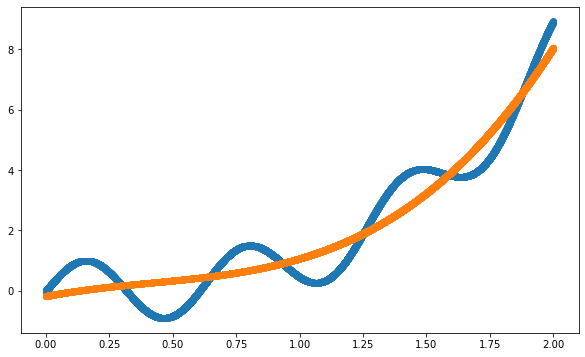

In [13]:
x_train_hat = x_train**3 * w[1] + x_train**2 * w[2] + x_train* w[1] + w[0]
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train)
plt.scatter(x_train, x_train_hat)
plt.show()

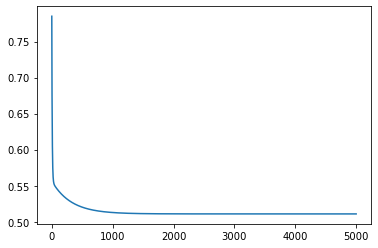

In [14]:
plt.plot(MSEi)